# Visualize APEX frame

## Imports

## Imports

In [15]:
PATH = '/Users/strim/Documents/Work/METEOCPY' # replace with the parent director of your meteocpy installation
DATA_PATH = '/Users/strim/Documents/Work/METEOCPY' # replace with the parent directory of where you installed data and params

In [16]:
import sys
sys.path.append(PATH)
sys.path.append(DATA_PATH)

In [17]:
import meteocpy as mpy
from meteocpy import utils, forward
sys.modules['forward'] = forward
sys.modules['utils'] = utils

from meteocpy.forward import apex
from meteocpy.utils import load_params, BiDict, plot_frame
from meteocpy.calibration.utils_calibrate import gather_simulations

import numpy as np
import os
import dill as pkl
import matplotlib.pyplot as plt
from os.path import join as pjoin

from importlib import reload

In [18]:
%matplotlib inline

In [19]:
# if you change the code and want to run it here with your changes, run this cell first!
reload(apex)
reload(utils)

<module 'meteocpy.utils' from '/Users/strim/Documents/Work/METEOCPY/meteocpy/utils.py'>

## Read Simulation

In [20]:
# load simulation
home = '/Users/strim/Documents/Work/METEOCPY/meteocpy/'
simu_path = pjoin(home, 'simulations/test')
simu_model = pjoin(home, 'saved_apex_models', 'apex_700_1300')

# load simulation
with open(os.path.join(simu_path, 'frames'), 'rb') as f:
    frames = pkl.load(f)

with open(os.path.join(simu_path, 'band_indices'), 'rb') as f:
    illu_bands = pkl.load(f)

with open(os.path.join(simu_path, 'simulation_config'), 'rb') as f:
    config = pkl.load(f)

with open(simu_model, 'rb') as f:
    ap = pkl.load(f)

## Plot the Simulation

In [21]:
config['inp_wvlens']

array([[ 710.        ],
       [ 710.33353922],
       [ 710.66707844],
       ...,
       [1249.33292156],
       [1249.66646078],
       [1250.        ]])

In [22]:
config['inp_spectrum'].shape

(1620, 7, 1)

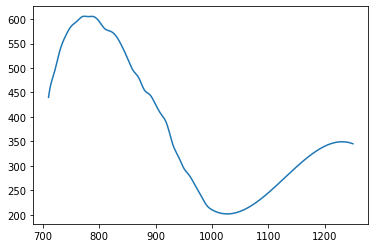

In [23]:
a = plt.plot(config['inp_wvlens'], config['inp_spectrum'][:, 0, :])

/Users/strim/Documents/Work/METEOCPY/meteocpy/utils.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_yticklabels([''] + wvls)


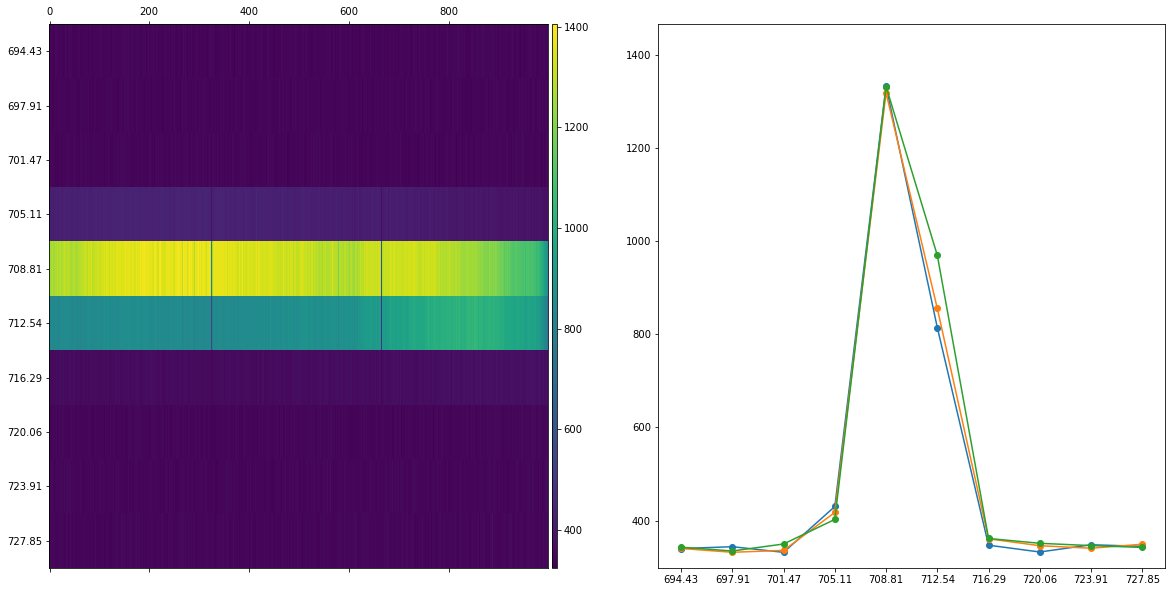

In [24]:
%matplotlib inline
plot_frame(ap, frames, illu_bands=illu_bands, ind=0, channel=3, figsize=(20, 10))

## SRF reconstruction

In [25]:
band_dict, wvl_dict = gather_simulations(frames, illu_bands, config['inp_wvlens'].reshape(-1))

In [26]:
# now band dict has the simulation ordered in band nrs, 
# nr of monochromatic inp_wvl, channel, and xtrack px
band_dict[60][0].shape

(7, 1000)

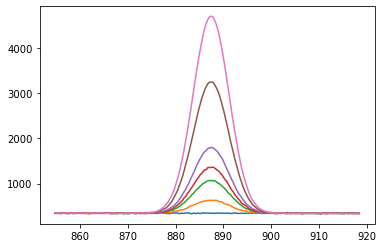

In [27]:
%matplotlib inline
band = 100
xtrack_px = 200

plt.figure()
concat_band = np.concatenate([band_dict[band]], axis=0) # get all the results for band
                                                        # in shape (inp_wvl, channel, xtrack)
for channel in range(frames[0].shape[0]):
    _ = plt.plot(wvl_dict[band], 
                 concat_band[:, channel, xtrack_px])
plt.show()

## Gain calibration

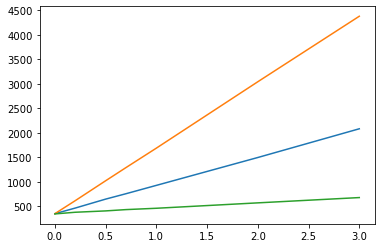

In [35]:
band = 100
plt.plot(np.array([0.001, 0.2, 0.5, 0.7, 1, 2, 3]), 
            np.concatenate([band_dict[band]], axis=0)[[80,100,120], :, 500].transpose())

In [29]:
# here we called the spatial band 500 (nadir)

In [30]:
np.concatenate([band_dict[band]], axis=0)[[10,40,80,100], :, 500].transpose(1,0).shape

(7, 4)

In [31]:
np.concatenate([band_dict[band]], axis=0).shape

(192, 7, 1000)

In [32]:
wvl_dict[100][80]

881.4391599752934

In [37]:
wvl_dict[100][79]

881.1056207535515

In [33]:
len(band_dict)

101

In [34]:
len(band_dict[100])

192

In [67]:
ap.model['binned'].initialized_support

(810.0, 890.0)

In [68]:
ap.model['binned'].srf_support_per_band

array([[ 766.17947787,  813.19903806],
       [ 770.81777742,  818.50120178],
       [ 775.51429088,  823.92609181],
       [ 780.29232958,  829.48725231],
       [ 785.16373671,  835.14913912],
       [ 790.0766223 ,  840.84465667],
       [ 794.96078208,  846.58179949],
       [ 799.88330778,  852.46180104],
       [ 804.95064459,  858.53903744],
       [ 810.16437323,  864.88218764],
       [ 815.49272009,  871.3323997 ],
       [ 820.90330127,  877.76309832],
       [ 826.41101422,  884.15127383],
       [ 831.93472242,  890.72052902],
       [ 837.52187795,  897.44667166],
       [ 843.16200481,  904.34327498],
       [ 848.86072058,  911.4329778 ],
       [ 854.52606015,  918.71720528],
       [ 860.14701671,  926.19277551],
       [ 865.73696028,  933.8544458 ],
       [ 871.30390899,  941.73993756],
       [ 876.84686269,  949.86262109],
       [ 882.33351128,  958.18187133],
       [ 887.65506114,  966.86187834],
       [ 892.67888585,  976.07922477],
       [ 897.40705778,  9

In [69]:
[o.shape for o in ap.get('srfs')]

[(1, 1000, 10),
 (1, 1000, 26),
 (1, 1000, 42),
 (1, 1000, 59),
 (1, 1000, 76),
 (1, 1000, 93),
 (1, 1000, 110),
 (1, 1000, 127),
 (1, 1000, 146),
 (1, 1000, 163),
 (1, 1000, 167),
 (1, 1000, 170),
 (1, 1000, 172),
 (1, 1000, 174),
 (1, 1000, 157),
 (1, 1000, 140),
 (1, 1000, 123),
 (1, 1000, 106),
 (1, 1000, 90),
 (1, 1000, 73),
 (1, 1000, 56),
 (1, 1000, 40),
 (1, 1000, 23),
 (1, 1000, 8),
 (1, 1000, 0),
 (1, 1000, 0),
 (1, 1000, 0),
 (1, 1000, 0),
 (1, 1000, 0),
 (1, 1000, 0),
 (1, 1000, 0),
 (1, 1000, 0),
 (1, 1000, 0),
 (1, 1000, 0),
 (1, 1000, 75),
 (1, 1000, 53),
 (1, 1000, 30),
 (1, 1000, 8)]